In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
from scipy import stats
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

# 1.ATAC

In [2]:
atac = pd.read_csv('/mnt/i/Suspended/ATAC-seq/mm10_t3_atac/Runtime/data/peak_info_annotated.txt', sep='\t')
print(atac.shape)
atac.columns = ['PeakID',
       'Chr', 'Start', 'End', 'Strand', 'Peak Score',
       'Focus Ratio/Region Size', 'Annotation', 'Detailed Annotation',
       'Distance to TSS', 'Nearest PromoterID', 'Entrez ID', 'Nearest Unigene',
       'Nearest Refseq', 'Nearest Ensembl', 'Gene Name', 'Gene Alias',
       'Gene Description', 'Gene Type']
atac

(34276, 19)


,PeakID,Chr,Start,End,Strand,Peak Score,Focus Ratio/Region Size,Annotation,Detailed Annotation,Distance to TSS,Nearest PromoterID,Entrez ID,Nearest Unigene,Nearest Refseq,Nearest Ensembl,Gene Name,Gene Alias,Gene Description,Gene Type
0,T21-2A_FKDL190740162-1a_peak_13261l,chr1,88229308,88229807,+,0,NaN,"intron (NM_001281466, intron 3 of 41)",NaN,2537.0,NM_001281466,100040766.0,Mm.386915,NM_001177364,ENSMUSG00000079429,Mroh2a,Heatr7b1,maestro heat-like repeat family member 2A,protein-coding
1,T21-1A_FKDL190740161-1a_peak_15366b,chr1,105356470,105356969,+,0,NaN,promoter-TSS (NM_001160368),NaN,-9.0,NM_001160368,320311.0,Mm.389162,NM_178779,ENSMUSG00000047496,Rnf152,A930029B02Rik,ring finger protein 152,protein-coding
2,S21-2A_FKDL190740156-1a_peak_23962a,chr1,143739320,143739819,+,0,NaN,promoter-TSS (NM_023505),NaN,1.0,NM_001038592,69367.0,Mm.272727,NM_023505,ENSMUSG00000018196,Glrx2,1700010P22Rik|AI645710|Grx2,glutaredoxin 2 (thioltransferase),protein-coding
3,S21-2A_FKDL190740156-1a_peak_96847,chr11,119053220,119053719,+,0,NaN,Intergenic,NaN,-12556.0,NM_013926,30951.0,Mm.99953,NM_013926,ENSMUSG00000025578,Cbx8,Pc3,chromobox 8,protein-coding
4,S21-1A_FKDL190740155-1a_peak_17284k,chr1,88285200,88285699,+,0,NaN,Intergenic,NaN,-7870.0,NM_198652,381280.0,Mm.384762,NM_198652,ENSMUSG00000044783,Hjurp,6430706D22Rik|A730008H23Rik|C330011F01Rik|Gm97...,Holliday junction recognition protein,protein-coding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34271,T21-3A_FKDL190740163-1a_peak_92758b,chr13,22042836,22043335,+,0,NaN,promoter-TSS (NM_178186),NaN,-113.0,NM_178198,319183.0,Mm.371766,NM_178198,ENSMUSG00000069300,Hist1h2bj,-,"histone cluster 1, H2bj",protein-coding
34272,S21-2A_FKDL190740156-1a_peak_59508a,chr10,127526613,127527112,+,0,NaN,"exon (NM_183297, exon 2 of 2)",NaN,-4418.0,NM_028230,108037.0,Mm.29890,NM_028230,ENSMUSG00000025403,Shmt2,2700043D08Rik|AA408223|AA986903|SHMT,serine hydroxymethyltransferase 2 (mitochondrial),protein-coding
34273,T21-1A_FKDL190740161-1a_peak_131740,chr13,107485604,107486103,+,0,NaN,Intergenic,NaN,16031.0,NR_045084,105120.0,Mm.417700,NR_045083,ENSMUSG00000114780,AI197445,-,expressed sequence AI197445,ncRNA
34274,T21-3A_FKDL190740163-1a_peak_5513d,chr1,58712482,58712981,+,0,NaN,promoter-TSS (NM_009805),NaN,-555.0,NM_207653,12633.0,Mm.336848,NM_009805,ENSMUSG00000026031,Cflar,2310024N18Rik|A430105C05Rik|CLARP|Cash|Casper|...,CASP8 and FADD-like apoptosis regulator,protein-coding


In [3]:
atac_deg = pd.read_csv('/home/lzz/atac/output/diff_blm_pbs.csv')
atac_deg

,peak,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,S21-2A_FKDL190740156-1a_peak_121b,117.813587,0.020574,0.220373,0.093362,0.925616,0.970424
1,S21-2A_FKDL190740156-1a_peak_132,247.944432,-0.274061,0.179765,-1.524553,0.127371,0.399905
2,T21-2A_FKDL190740162-1a_peak_148b,59.203391,0.152699,0.303292,0.503471,0.614633,0.821774
3,T21-3A_FKDL190740163-1a_peak_86,86.677245,-0.063211,0.253762,-0.249095,0.803287,0.920908
4,S21-2A_FKDL190740156-1a_peak_168,125.689001,0.086786,0.223392,0.388493,0.697651,0.868226
...,...,...,...,...,...,...,...
34271,S21-1A_FKDL190740155-1a_peak_675515,64.786479,-0.483991,0.354097,-1.366831,0.171678,0.461489
34272,S21-1A_FKDL190740155-1a_peak_675516,81.652355,-0.943471,0.349784,-2.697293,0.006991,0.099029
34273,S21-1A_FKDL190740155-1a_peak_675518,74.587309,-0.966932,0.635737,-1.520964,0.128269,0.400925
34274,S21-1A_FKDL190740155-1a_peak_675519,42.595354,-1.238538,0.454152,-2.727146,0.006388,0.095138


In [4]:
atac_all = pd.merge(atac, atac_deg, left_on='PeakID', right_on='peak')
atac_all

,PeakID,Chr,Start,End,Strand,Peak Score,Focus Ratio/Region Size,Annotation,Detailed Annotation,Distance to TSS,...,Gene Alias,Gene Description,Gene Type,peak,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,T21-2A_FKDL190740162-1a_peak_13261l,chr1,88229308,88229807,+,0,NaN,"intron (NM_001281466, intron 3 of 41)",NaN,2537.0,...,Heatr7b1,maestro heat-like repeat family member 2A,protein-coding,T21-2A_FKDL190740162-1a_peak_13261l,135.750782,-0.028660,0.254903,-0.112436,0.910477,0.964714
1,T21-1A_FKDL190740161-1a_peak_15366b,chr1,105356470,105356969,+,0,NaN,promoter-TSS (NM_001160368),NaN,-9.0,...,A930029B02Rik,ring finger protein 152,protein-coding,T21-1A_FKDL190740161-1a_peak_15366b,99.788011,-0.103366,0.228276,-0.452811,0.650685,0.841800
2,S21-2A_FKDL190740156-1a_peak_23962a,chr1,143739320,143739819,+,0,NaN,promoter-TSS (NM_023505),NaN,1.0,...,1700010P22Rik|AI645710|Grx2,glutaredoxin 2 (thioltransferase),protein-coding,S21-2A_FKDL190740156-1a_peak_23962a,315.242909,-0.098177,0.153717,-0.638686,0.523027,0.766233
3,S21-2A_FKDL190740156-1a_peak_96847,chr11,119053220,119053719,+,0,NaN,Intergenic,NaN,-12556.0,...,Pc3,chromobox 8,protein-coding,S21-2A_FKDL190740156-1a_peak_96847,114.442420,-0.029645,0.253097,-0.117127,0.906759,0.963664
4,S21-1A_FKDL190740155-1a_peak_17284k,chr1,88285200,88285699,+,0,NaN,Intergenic,NaN,-7870.0,...,6430706D22Rik|A730008H23Rik|C330011F01Rik|Gm97...,Holliday junction recognition protein,protein-coding,S21-1A_FKDL190740155-1a_peak_17284k,113.531905,0.060849,0.297936,0.204235,0.838170,0.935855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34271,T21-3A_FKDL190740163-1a_peak_92758b,chr13,22042836,22043335,+,0,NaN,promoter-TSS (NM_178186),NaN,-113.0,...,-,"histone cluster 1, H2bj",protein-coding,T21-3A_FKDL190740163-1a_peak_92758b,133.361963,0.303936,0.201208,1.510557,0.130901,0.405126
34272,S21-2A_FKDL190740156-1a_peak_59508a,chr10,127526613,127527112,+,0,NaN,"exon (NM_183297, exon 2 of 2)",NaN,-4418.0,...,2700043D08Rik|AA408223|AA986903|SHMT,serine hydroxymethyltransferase 2 (mitochondrial),protein-coding,S21-2A_FKDL190740156-1a_peak_59508a,68.904095,-0.174237,0.275112,-0.633331,0.526517,0.768544
34273,T21-1A_FKDL190740161-1a_peak_131740,chr13,107485604,107486103,+,0,NaN,Intergenic,NaN,16031.0,...,-,expressed sequence AI197445,ncRNA,T21-1A_FKDL190740161-1a_peak_131740,59.674573,0.083457,0.272028,0.306796,0.758999,0.899224
34274,T21-3A_FKDL190740163-1a_peak_5513d,chr1,58712482,58712981,+,0,NaN,promoter-TSS (NM_009805),NaN,-555.0,...,2310024N18Rik|A430105C05Rik|CLARP|Cash|Casper|...,CASP8 and FADD-like apoptosis regulator,protein-coding,T21-3A_FKDL190740163-1a_peak_5513d,225.106405,0.051698,0.184208,0.280651,0.778978,0.909720


In [5]:
atac_sub = atac_all.loc[:, ['Nearest Ensembl', 'baseMean', 'log2FoldChange', 'lfcSE', 'stat', 'pvalue', 'padj']]
atac_sub.columns = ['Ensembl_atac', 'baseMean_atac', 'log2FoldChange_atac', 'lfcSE_atac', 'stat_atac', 'pvalue_atac', 'padj_atac']
atac_sub

,Ensembl_atac,baseMean_atac,log2FoldChange_atac,lfcSE_atac,stat_atac,pvalue_atac,padj_atac
0,ENSMUSG00000079429,135.750782,-0.028660,0.254903,-0.112436,0.910477,0.964714
1,ENSMUSG00000047496,99.788011,-0.103366,0.228276,-0.452811,0.650685,0.841800
2,ENSMUSG00000018196,315.242909,-0.098177,0.153717,-0.638686,0.523027,0.766233
3,ENSMUSG00000025578,114.442420,-0.029645,0.253097,-0.117127,0.906759,0.963664
4,ENSMUSG00000044783,113.531905,0.060849,0.297936,0.204235,0.838170,0.935855
...,...,...,...,...,...,...,...
34271,ENSMUSG00000069300,133.361963,0.303936,0.201208,1.510557,0.130901,0.405126
34272,ENSMUSG00000025403,68.904095,-0.174237,0.275112,-0.633331,0.526517,0.768544
34273,ENSMUSG00000114780,59.674573,0.083457,0.272028,0.306796,0.758999,0.899224
34274,ENSMUSG00000026031,225.106405,0.051698,0.184208,0.280651,0.778978,0.909720


In [7]:
pd.DataFrame(atac_sub[atac_sub['padj_atac'] < 0.05]['Ensembl_atac'].unique()).to_csv('atac_sig_genelist.tsv', index=False, header=False, sep='\t')

In [8]:
atac_sub_up = atac_sub[(atac_sub['padj_atac'] < 0.05) & (atac_sub['log2FoldChange_atac'] > 0)]
atac_sub_up

,Ensembl_atac,baseMean_atac,log2FoldChange_atac,lfcSE_atac,stat_atac,pvalue_atac,padj_atac
17,ENSMUSG00000021900,91.737110,0.959859,0.234275,4.097149,4.182704e-05,0.005532
39,ENSMUSG00000041377,71.882450,1.206945,0.298959,4.037162,5.410173e-05,0.006576
41,ENSMUSG00000027435,82.380996,1.155837,0.265878,4.347252,1.378539e-05,0.002568
75,ENSMUSG00000113210,217.033433,1.118300,0.181764,6.152487,7.627707e-10,0.000002
143,ENSMUSG00000041377,272.321542,0.787873,0.200757,3.924501,8.690962e-05,0.009000
...,...,...,...,...,...,...,...
34002,NaN,65.714999,0.842121,0.270227,3.116352,1.831036e-03,0.049041
34005,ENSMUSG00000022637,134.356494,0.949577,0.220377,4.308867,1.640928e-05,0.002884
34013,NaN,134.093734,1.176521,0.222329,5.291796,1.211212e-07,0.000101
34202,ENSMUSG00000004771,117.086743,1.216647,0.228792,5.317699,1.050876e-07,0.000090


In [9]:
atac_sub_dw = atac_sub[(atac_sub['padj_atac'] < 0.05) & (atac_sub['log2FoldChange_atac'] < 0)]
atac_sub_dw

,Ensembl_atac,baseMean_atac,log2FoldChange_atac,lfcSE_atac,stat_atac,pvalue_atac,padj_atac
16,ENSMUSG00000021252,50.655392,-1.085661,0.308337,-3.521025,0.000430,0.022393
51,ENSMUSG00000042812,199.398155,-0.874655,0.196881,-4.442554,0.000009,0.002024
118,ENSMUSG00000055239,289.818996,-0.612089,0.185718,-3.295806,0.000981,0.035409
254,ENSMUSG00000063275,217.526710,-0.668933,0.174949,-3.823579,0.000132,0.011299
303,ENSMUSG00000022964,635.334398,-0.470975,0.141622,-3.325567,0.000882,0.033208
...,...,...,...,...,...,...,...
34027,ENSMUSG00000046841,235.678316,-0.735004,0.202014,-3.638385,0.000274,0.017473
34085,ENSMUSG00000034312,143.987326,-0.866687,0.207554,-4.175728,0.000030,0.004242
34131,ENSMUSG00000063146,72.241582,-0.963872,0.262487,-3.672068,0.000241,0.016266
34146,ENSMUSG00000027314,162.542888,-0.655894,0.201683,-3.252104,0.001146,0.038270


# 2.RNA

In [10]:
rna = pd.read_csv('/home/lzz/rna/output/diff_blm_pbs.csv')
rna.columns = ['Ensembl_rna', 'baseMean_rna', 'log2FoldChange_rna', 'lfcSE_rna', 'stat_rna', 'pvalue_rna', 'padj_rna']
rna['Ensembl_rna'] = [i[0] for i in rna['Ensembl_rna'].str.split('.')]
print(rna.shape)
rna

(21344, 7)


,Ensembl_rna,baseMean_rna,log2FoldChange_rna,lfcSE_rna,stat_rna,pvalue_rna,padj_rna
0,ENSMUSG00000000001,4081.829916,0.083977,0.085308,0.984400,0.324919,0.544734
1,ENSMUSG00000000028,134.635554,0.160473,0.195160,0.822264,0.410926,0.626292
2,ENSMUSG00000000031,41.267060,1.616352,0.516968,3.126598,0.001768,0.009923
3,ENSMUSG00000000037,12.176036,0.721355,0.638266,1.130179,0.258401,0.472677
4,ENSMUSG00000000049,4.257233,0.470250,1.132811,0.415118,0.678055,NaN
...,...,...,...,...,...,...,...
21339,ENSMUSG00000118425,3.183742,-2.414260,1.645962,-1.466778,0.142437,NaN
21340,ENSMUSG00000118449,14.595959,0.140134,0.561274,0.249671,0.802842,0.903379
21341,ENSMUSG00000118456,116.958481,-0.523188,0.199461,-2.623016,0.008716,0.037902
21342,ENSMUSG00000118458,1.735343,0.319902,1.734829,0.184400,0.853700,NaN


# 3.Corraltion

In [11]:
dat_all = pd.merge(atac_sub, rna, right_on='Ensembl_rna', left_on='Ensembl_atac', how='inner')
dat_all

,Ensembl_atac,baseMean_atac,log2FoldChange_atac,lfcSE_atac,stat_atac,pvalue_atac,padj_atac,Ensembl_rna,baseMean_rna,log2FoldChange_rna,lfcSE_rna,stat_rna,pvalue_rna,padj_rna
0,ENSMUSG00000079429,135.750782,-0.028660,0.254903,-0.112436,0.910477,0.964714,ENSMUSG00000079429,261.014254,-0.424576,0.143553,-2.957632,0.003100,0.015959
1,ENSMUSG00000047496,99.788011,-0.103366,0.228276,-0.452811,0.650685,0.841800,ENSMUSG00000047496,53.484227,0.383260,0.306260,1.251420,0.210781,0.415381
2,ENSMUSG00000018196,315.242909,-0.098177,0.153717,-0.638686,0.523027,0.766233,ENSMUSG00000018196,620.606848,0.060304,0.106349,0.567034,0.570691,0.753046
3,ENSMUSG00000025578,114.442420,-0.029645,0.253097,-0.117127,0.906759,0.963664,ENSMUSG00000025578,242.305717,-0.012902,0.161281,-0.079994,0.936242,0.969548
4,ENSMUSG00000044783,113.531905,0.060849,0.297936,0.204235,0.838170,0.935855,ENSMUSG00000044783,2673.350723,-0.258526,0.088481,-2.921811,0.003480,0.017573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30911,ENSMUSG00000069300,133.361963,0.303936,0.201208,1.510557,0.130901,0.405126,ENSMUSG00000069300,2.578197,0.892887,1.452200,0.614851,0.538653,NaN
30912,ENSMUSG00000025403,68.904095,-0.174237,0.275112,-0.633331,0.526517,0.768544,ENSMUSG00000025403,852.780240,-0.043988,0.093192,-0.472009,0.636920,0.799162
30913,ENSMUSG00000114780,59.674573,0.083457,0.272028,0.306796,0.758999,0.899224,ENSMUSG00000114780,19.482651,-0.222017,0.590476,-0.375996,0.706920,0.844280
30914,ENSMUSG00000026031,225.106405,0.051698,0.184208,0.280651,0.778978,0.909720,ENSMUSG00000026031,5442.152058,-0.206592,0.107471,-1.922309,0.054567,0.160556


In [12]:
dat_all.to_csv('/home/lzz/atac/output/atac_rna.csv', index=False)

Text(0.1, 0.9, 'y = 0.287x + 0.036')

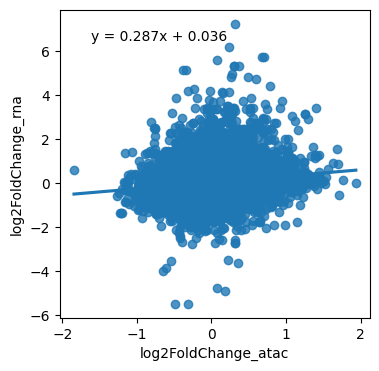

In [13]:
plt.figure(figsize=(4,4))
p = sns.regplot(x= 'log2FoldChange_atac', y='log2FoldChange_rna', data = dat_all)
#calculate slope and intercept of regression equation
slope, intercept, r, p, sterr = stats.linregress(x=p.get_lines()[0].get_xdata(),
                                                       y=p.get_lines()[0].get_ydata())

#add regression equation to plot
plt.text(0.1, 0.9, 'y = ' + str(round(slope,3)) + 'x + ' + str(round(intercept,3)), transform=plt.gca().transAxes)

In [14]:
dat_all['log2FoldChange_atac'].corr(dat_all['log2FoldChange_rna'], method='spearman')

0.19377896451388857

In [15]:
dat_all = dat_all.loc[(dat_all['padj_rna'] < 0.05) & (dat_all['padj_atac'] < 0.05), :]
dat_all.to_csv('/home/lzz/atac/output/atac_rna_sig.csv', index=False)

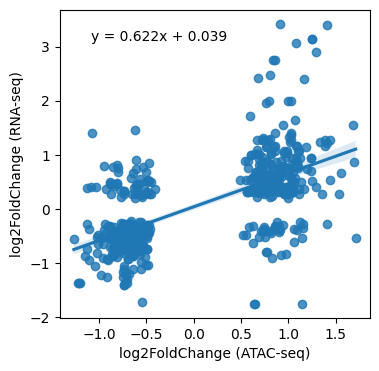

In [18]:
plt.figure(figsize=(4,4))
sns.regplot(x= 'log2FoldChange_atac', y='log2FoldChange_rna', data = dat_all)
#calculate slope and intercept of regression equation
slope, intercept, r, p, sterr = stats.linregress(x=dat_all['log2FoldChange_atac'],
                                                 y=dat_all['log2FoldChange_rna'])
plt.xlabel('log2FoldChange (ATAC-seq)')
plt.ylabel('log2FoldChange (RNA-seq)')
#add regression equation to plot
plt.text(0.1, 0.9, 'y = ' + str(round(slope,3)) + 'x + ' + str(round(intercept,3)), transform=plt.gca().transAxes)
plt.savefig('scatter_atac_rna_corplot.pdf', bbox_inches='tight')

In [19]:
stats.linregress(x=dat_all['log2FoldChange_atac'], y=dat_all['log2FoldChange_rna'])

LinregressResult(slope=0.6220628163365451, intercept=0.03850498958802598, rvalue=0.6212347922478613, pvalue=1.1155588128264816e-57, stderr=0.03421319219011889, intercept_stderr=0.028384064055272728)

In [20]:
stats.spearmanr(dat_all['log2FoldChange_atac'], dat_all['log2FoldChange_rna'])

SignificanceResult(statistic=0.6015443097366284, pvalue=2.8459637429344974e-53)

In [21]:
stats.pearsonr(dat_all['log2FoldChange_atac'], dat_all['log2FoldChange_rna'])

PearsonRResult(statistic=0.6212347922478609, pvalue=1.1155588128266807e-57)

# 4.boxplot

In [22]:
dat_all_up = pd.merge(atac_sub_up, rna, right_on='Ensembl_rna', left_on='Ensembl_atac', how='inner')
dat_all_up

,Ensembl_atac,baseMean_atac,log2FoldChange_atac,lfcSE_atac,stat_atac,pvalue_atac,padj_atac,Ensembl_rna,baseMean_rna,log2FoldChange_rna,lfcSE_rna,stat_rna,pvalue_rna,padj_rna
0,ENSMUSG00000021900,91.737110,0.959859,0.234275,4.097149,4.182704e-05,0.005532,ENSMUSG00000021900,634.533524,0.136549,0.110253,1.238508,2.155279e-01,4.217884e-01
1,ENSMUSG00000027435,82.380996,1.155837,0.265878,4.347252,1.378539e-05,0.002568,ENSMUSG00000027435,19811.377104,-0.355388,0.139654,-2.544770,1.093498e-02,4.562828e-02
2,ENSMUSG00000040133,65.821620,1.405229,0.289251,4.858171,1.184751e-06,0.000527,ENSMUSG00000040133,51.158367,3.394579,0.380517,8.920976,4.621983e-19,3.023445e-17
3,ENSMUSG00000074671,169.260948,0.831162,0.197966,4.198516,2.686701e-05,0.003953,ENSMUSG00000074671,194.964867,0.178640,0.171047,1.044395,2.963028e-01,5.150646e-01
4,ENSMUSG00000029370,37.297337,1.188451,0.338827,3.507545,4.522613e-04,0.022939,ENSMUSG00000029370,21.503070,-0.974488,0.442339,-2.203036,2.759222e-02,9.516772e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,ENSMUSG00000038623,209.129531,0.826221,0.187615,4.403818,1.063620e-05,0.002196,ENSMUSG00000038623,3104.714349,0.613004,0.133237,4.600853,4.207636e-06,4.756121e-05
571,ENSMUSG00000021665,117.161872,0.764264,0.215634,3.544257,3.937218e-04,0.021219,ENSMUSG00000021665,4265.008106,1.961508,0.086152,22.767865,9.548603e-115,1.173387e-111
572,ENSMUSG00000047604,306.180136,0.600069,0.183911,3.262817,1.103106e-03,0.037892,ENSMUSG00000047604,521.825724,-0.043786,0.130533,-0.335440,7.372933e-01,8.637654e-01
573,ENSMUSG00000022637,134.356494,0.949577,0.220377,4.308867,1.640928e-05,0.002884,ENSMUSG00000022637,2155.407815,-0.139514,0.083423,-1.672373,9.445074e-02,2.401257e-01


In [23]:
dat_all_dw = pd.merge(atac_sub_dw, rna, right_on='Ensembl_rna', left_on='Ensembl_atac', how='inner')
dat_all_dw

,Ensembl_atac,baseMean_atac,log2FoldChange_atac,lfcSE_atac,stat_atac,pvalue_atac,padj_atac,Ensembl_rna,baseMean_rna,log2FoldChange_rna,lfcSE_rna,stat_rna,pvalue_rna,padj_rna
0,ENSMUSG00000021252,50.655392,-1.085661,0.308337,-3.521025,0.000430,0.022393,ENSMUSG00000021252,454.420035,0.406346,0.141344,2.874882,4.041790e-03,0.019884
1,ENSMUSG00000042812,199.398155,-0.874655,0.196881,-4.442554,0.000009,0.002024,ENSMUSG00000042812,7431.053043,-0.554954,0.102876,-5.394412,6.874840e-08,0.000001
2,ENSMUSG00000055239,289.818996,-0.612089,0.185718,-3.295806,0.000981,0.035409,ENSMUSG00000055239,2211.302338,-0.039459,0.089298,-0.441880,6.585763e-01,0.813538
3,ENSMUSG00000063275,217.526710,-0.668933,0.174949,-3.823579,0.000132,0.011299,ENSMUSG00000063275,111.466393,0.568023,0.206436,2.751570,5.931035e-03,0.027363
4,ENSMUSG00000022964,635.334398,-0.470975,0.141622,-3.325567,0.000882,0.033208,ENSMUSG00000022964,2001.539489,0.012320,0.090127,0.136701,8.912672e-01,0.950081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,ENSMUSG00000046841,235.678316,-0.735004,0.202014,-3.638385,0.000274,0.017473,ENSMUSG00000046841,977.115679,0.328440,0.112075,2.930549,3.383639e-03,0.017157
556,ENSMUSG00000034312,143.987326,-0.866687,0.207554,-4.175728,0.000030,0.004242,ENSMUSG00000034312,5918.027786,0.467777,0.115175,4.061461,4.876665e-05,0.000430
557,ENSMUSG00000063146,72.241582,-0.963872,0.262487,-3.672068,0.000241,0.016266,ENSMUSG00000063146,1125.595442,0.186842,0.098225,1.902188,5.714659e-02,0.166391
558,ENSMUSG00000027314,162.542888,-0.655894,0.201683,-3.252104,0.001146,0.038270,ENSMUSG00000027314,2386.000607,-0.509912,0.158247,-3.222252,1.271874e-03,0.007499


In [29]:
dat_pt = pd.DataFrame(
    {'log2FoldChange': dat_all_up['log2FoldChange_rna'].tolist() + dat_all_dw['log2FoldChange_rna'].tolist(),
     'condition': ['Hyper']*dat_all_up.shape[0] + ['Hypo']*dat_all_dw.shape[0]}
    )

In [30]:
dat_pt

,log2FoldChange,condition
0,0.136549,Hyper
1,-0.355388,Hyper
2,3.394579,Hyper
3,0.178640,Hyper
4,-0.974488,Hyper
...,...,...
1130,0.328440,Hypo
1131,0.467777,Hypo
1132,0.186842,Hypo
1133,-0.509912,Hypo


In [26]:
condition1 = dat_pt[dat_pt['condition'] == 'Up']['log2FoldChange']
condition2 = dat_pt[dat_pt['condition'] == 'Down']['log2FoldChange']
w_statistic, p_value = stats.ranksums(condition1, condition2)
w_statistic, p_value

(16.76610015839603, 4.319444973882215e-63)

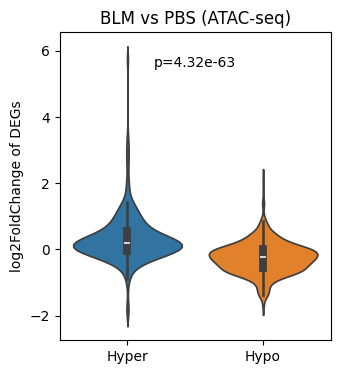

In [32]:
plt.figure(figsize=(3.5, 4))
sns.violinplot(data=dat_pt, x='condition', y='log2FoldChange', hue='condition')
plt.title('BLM vs PBS (ATAC-seq)')
plt.ylabel('log2FoldChange of DEGs')
plt.xlabel('')
plt.text(0.5, 0.9, f'p={p_value:.2e}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.savefig('violin_atac_rna.pdf', bbox_inches='tight')

## 4.2 Up

In [33]:
dds = ad.read_h5ad('/home/lzz/rna/data/dds.h5ad')
dds

AnnData object with n_obs × n_vars = 6 × 21344
    obs: 'condition'
    obsm: 'design_matrix', 'replaceable', 'size_factors'
    layers: '_hat_diagonals', '_mu_LFC', '_mu_hat', 'cooks', 'normed_counts', 'vst_counts'

In [34]:
dds.var_names = dds.var_names.str.split('.').str[0]

In [35]:
dat_id = pd.Series(atac_sub_up['Ensembl_atac'].unique())
pd.Series(dat_id.isin(dds.var_names)).value_counts()

True     430
False     54
Name: count, dtype: int64

In [36]:
id_list = dds.var_names.intersection(atac_sub_up['Ensembl_atac'].unique())
id_list

Index(['ENSMUSG00000000078', 'ENSMUSG00000000489', 'ENSMUSG00000001248',
       'ENSMUSG00000001576', 'ENSMUSG00000001930', 'ENSMUSG00000002250',
       'ENSMUSG00000002489', 'ENSMUSG00000002635', 'ENSMUSG00000002699',
       'ENSMUSG00000002728',
       ...
       'ENSMUSG00000097915', 'ENSMUSG00000097990', 'ENSMUSG00000101959',
       'ENSMUSG00000109305', 'ENSMUSG00000109473', 'ENSMUSG00000109864',
       'ENSMUSG00000112765', 'ENSMUSG00000115518', 'ENSMUSG00000115620',
       'ENSMUSG00000117975'],
      dtype='object', length=430)

In [37]:
dds_sub = dds[: , id_list]
dds_sub

View of AnnData object with n_obs × n_vars = 6 × 430
    obs: 'condition'
    obsm: 'design_matrix', 'replaceable', 'size_factors'
    layers: '_hat_diagonals', '_mu_LFC', '_mu_hat', 'cooks', 'normed_counts', 'vst_counts'

In [38]:
dat_pt = pd.DataFrame(dds_sub.layers['normed_counts'], index=dds_sub.obs_names, columns=dds_sub.var_names)
dat_pt_avg = dat_pt.groupby(dds_sub.obs['condition']).mean()
dat_pt_avg


/tmp/ipykernel_11114/3788985237.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dat_pt_avg = dat_pt.groupby(dds_sub.obs['condition']).mean()


,ENSMUSG00000000078,ENSMUSG00000000489,ENSMUSG00000001248,ENSMUSG00000001576,ENSMUSG00000001930,ENSMUSG00000002250,ENSMUSG00000002489,ENSMUSG00000002635,ENSMUSG00000002699,ENSMUSG00000002728,...,ENSMUSG00000097915,ENSMUSG00000097990,ENSMUSG00000101959,ENSMUSG00000109305,ENSMUSG00000109473,ENSMUSG00000109864,ENSMUSG00000112765,ENSMUSG00000115518,ENSMUSG00000115620,ENSMUSG00000117975
condition,,,,,,,,,,,,,,,,,,,,,
BLM,10523.322922,2917.646143,4535.624411,1676.006083,16403.508877,1034.788857,886.809874,382.465721,2113.878886,944.252639,...,93.363361,129.235648,4.521842,6.879424,1.837512,85.718722,2.184490,8.267220,2.265979,1545.176943
PBS,9749.596866,3370.591067,3937.933058,1637.230077,17473.812158,876.083229,583.490392,332.036202,1848.873298,882.464008,...,122.921495,93.532018,3.130087,9.038755,7.117362,77.413017,2.185272,13.544517,1.829026,1783.198382


In [39]:
dat_pt_avg_log = np.log2(dat_pt_avg+1)
dat_pt_avg_log

,ENSMUSG00000000078,ENSMUSG00000000489,ENSMUSG00000001248,ENSMUSG00000001576,ENSMUSG00000001930,ENSMUSG00000002250,ENSMUSG00000002489,ENSMUSG00000002635,ENSMUSG00000002699,ENSMUSG00000002728,...,ENSMUSG00000097915,ENSMUSG00000097990,ENSMUSG00000101959,ENSMUSG00000109305,ENSMUSG00000109473,ENSMUSG00000109864,ENSMUSG00000112765,ENSMUSG00000115518,ENSMUSG00000115620,ENSMUSG00000117975
condition,,,,,,,,,,,,,,,,,,,,,
BLM,13.361440,11.511084,12.147404,10.711672,14.001805,10.016514,9.794107,8.582954,11.046359,9.884556,...,6.560155,7.024981,2.465150,2.978090,1.504627,6.438272,1.671062,3.212137,1.707515,10.59449
PBS,13.251275,11.719214,11.943589,10.677922,14.092989,9.776570,9.191035,8.379535,10.853211,9.787028,...,6.953283,6.562731,2.046172,3.327508,3.021011,6.293021,1.671416,3.862403,1.500306,10.80106


In [40]:
dat_pt_avg_log_reshaped = dat_pt_avg_log.reset_index().melt(id_vars='condition', var_name='ENSMUSG', value_name='log_value')
dat_pt_avg_log_reshaped['condition'] = dat_pt_avg_log_reshaped['condition'].cat.reorder_categories(['PBS', 'BLM'])
dat_pt_avg_log_reshaped

,condition,ENSMUSG,log_value
0,BLM,ENSMUSG00000000078,13.361440
1,PBS,ENSMUSG00000000078,13.251275
2,BLM,ENSMUSG00000000489,11.511084
3,PBS,ENSMUSG00000000489,11.719214
4,BLM,ENSMUSG00000001248,12.147404
...,...,...,...
855,PBS,ENSMUSG00000115518,3.862403
856,BLM,ENSMUSG00000115620,1.707515
857,PBS,ENSMUSG00000115620,1.500306
858,BLM,ENSMUSG00000117975,10.594490


In [41]:
condition1 = dat_pt_avg_log_reshaped[dat_pt_avg_log_reshaped['condition'] == 'BLM']['log_value']
condition2 = dat_pt_avg_log_reshaped[dat_pt_avg_log_reshaped['condition'] == 'PBS']['log_value']
w_statistic, p_value = stats.wilcoxon(condition1, condition2)
w_statistic, p_value


(22408.0, 1.7200940371270237e-20)

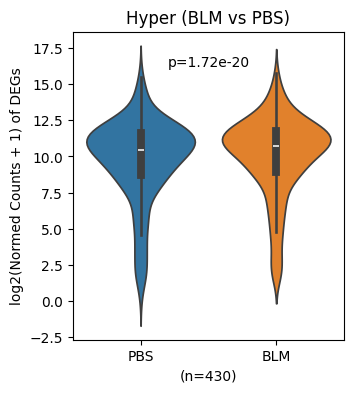

In [44]:
plt.figure(figsize=(3.5, 4))
sns.violinplot(data=dat_pt_avg_log_reshaped, x='condition', y='log_value', hue='condition')
plt.title('Hyper (BLM vs PBS)')
plt.xlabel(f'(n={dat_pt_avg_log.shape[1]})')
plt.ylabel('log2(Normed Counts + 1) of DEGs')
plt.text(0.5, 0.9, f'p={p_value:.2e}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.savefig('violin_rna_Hyper.pdf', bbox_inches='tight')

## 4.3 Down

In [45]:
dds = ad.read_h5ad('/home/lzz/rna/data/dds.h5ad')
dds

AnnData object with n_obs × n_vars = 6 × 21344
    obs: 'condition'
    obsm: 'design_matrix', 'replaceable', 'size_factors'
    layers: '_hat_diagonals', '_mu_LFC', '_mu_hat', 'cooks', 'normed_counts', 'vst_counts'

In [46]:
dds.var_names = dds.var_names.str.split('.').str[0]

In [47]:
dat_id = pd.Series(atac_sub_dw['Ensembl_atac'].unique())
pd.Series(dat_id.isin(dds.var_names)).value_counts()

True     440
False     32
Name: count, dtype: int64

In [48]:
id_list = dds.var_names.intersection(atac_sub_dw['Ensembl_atac'].unique())
id_list

Index(['ENSMUSG00000000093', 'ENSMUSG00000000420', 'ENSMUSG00000000530',
       'ENSMUSG00000000532', 'ENSMUSG00000000782', 'ENSMUSG00000000804',
       'ENSMUSG00000001288', 'ENSMUSG00000001440', 'ENSMUSG00000001552',
       'ENSMUSG00000001761',
       ...
       'ENSMUSG00000096145', 'ENSMUSG00000096986', 'ENSMUSG00000097080',
       'ENSMUSG00000097462', 'ENSMUSG00000097613', 'ENSMUSG00000100301',
       'ENSMUSG00000101360', 'ENSMUSG00000109644', 'ENSMUSG00000114780',
       'ENSMUSG00000117232'],
      dtype='object', length=440)

In [49]:
dds_sub = dds[: , id_list]
dds_sub

View of AnnData object with n_obs × n_vars = 6 × 440
    obs: 'condition'
    obsm: 'design_matrix', 'replaceable', 'size_factors'
    layers: '_hat_diagonals', '_mu_LFC', '_mu_hat', 'cooks', 'normed_counts', 'vst_counts'

In [50]:
dat_pt = pd.DataFrame(dds_sub.layers['normed_counts'], index=dds_sub.obs_names, columns=dds_sub.var_names)
dat_pt_avg = dat_pt.groupby(dds_sub.obs['condition']).mean()
dat_pt_avg


/tmp/ipykernel_11114/3788985237.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dat_pt_avg = dat_pt.groupby(dds_sub.obs['condition']).mean()


,ENSMUSG00000000093,ENSMUSG00000000420,ENSMUSG00000000530,ENSMUSG00000000532,ENSMUSG00000000782,ENSMUSG00000000804,ENSMUSG00000001288,ENSMUSG00000001440,ENSMUSG00000001552,ENSMUSG00000001761,...,ENSMUSG00000096145,ENSMUSG00000096986,ENSMUSG00000097080,ENSMUSG00000097462,ENSMUSG00000097613,ENSMUSG00000100301,ENSMUSG00000101360,ENSMUSG00000109644,ENSMUSG00000114780,ENSMUSG00000117232
condition,,,,,,,,,,,,,,,,,,,,,
BLM,4391.925931,3716.205637,13497.595488,2729.788202,1834.711672,1602.202920,1573.792509,4689.609681,9024.608623,568.648979,...,925.809242,2.766383,21.250511,48.074477,1.929230,2.776612,1.622940,9.503288,17.995081,0.949329
PBS,8198.619607,3221.499313,22349.997764,3188.198962,1847.601263,1833.284226,1832.388946,4958.390221,13128.790623,565.311230,...,797.031445,3.588074,29.202611,107.223260,1.235821,3.669246,2.115293,9.755985,20.970220,2.223488


In [51]:
dat_pt_avg_log = np.log2(dat_pt_avg+1)
dat_pt_avg_log

,ENSMUSG00000000093,ENSMUSG00000000420,ENSMUSG00000000530,ENSMUSG00000000532,ENSMUSG00000000782,ENSMUSG00000000804,ENSMUSG00000001288,ENSMUSG00000001440,ENSMUSG00000001552,ENSMUSG00000001761,...,ENSMUSG00000096145,ENSMUSG00000096986,ENSMUSG00000097080,ENSMUSG00000097462,ENSMUSG00000097613,ENSMUSG00000100301,ENSMUSG00000101360,ENSMUSG00000109644,ENSMUSG00000114780,ENSMUSG00000117232
condition,,,,,,,,,,,,,,,,,,,,,
BLM,12.100966,11.860003,13.720522,11.415102,10.842124,10.646741,10.620946,12.195560,13.139809,9.153929,...,9.856129,1.913180,4.475767,5.616901,1.550521,1.917093,1.391185,3.392769,4.247554,0.962977
PBS,13.001341,11.653964,14.448052,11.638978,10.852218,10.841001,10.840297,12.275947,13.680556,9.145451,...,9.640302,2.197889,4.916601,6.757867,1.160805,2.223190,1.639368,3.427068,4.457477,1.688623


In [52]:
dat_pt_avg_log_reshaped = dat_pt_avg_log.reset_index().melt(id_vars='condition', var_name='ENSMUSG', value_name='log_value')
dat_pt_avg_log_reshaped['condition'] = dat_pt_avg_log_reshaped['condition'].cat.reorder_categories(['PBS', 'BLM'])
dat_pt_avg_log_reshaped

,condition,ENSMUSG,log_value
0,BLM,ENSMUSG00000000093,12.100966
1,PBS,ENSMUSG00000000093,13.001341
2,BLM,ENSMUSG00000000420,11.860003
3,PBS,ENSMUSG00000000420,11.653964
4,BLM,ENSMUSG00000000530,13.720522
...,...,...,...
875,PBS,ENSMUSG00000109644,3.427068
876,BLM,ENSMUSG00000114780,4.247554
877,PBS,ENSMUSG00000114780,4.457477
878,BLM,ENSMUSG00000117232,0.962977


In [53]:
condition1 = dat_pt_avg_log_reshaped[dat_pt_avg_log_reshaped['condition'] == 'BLM']['log_value']
condition2 = dat_pt_avg_log_reshaped[dat_pt_avg_log_reshaped['condition'] == 'PBS']['log_value']
w_statistic, p_value = stats.wilcoxon(condition1, condition2)
w_statistic, p_value


(22473.0, 1.7421815766209837e-22)

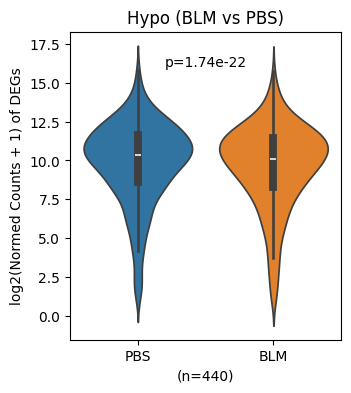

In [56]:
plt.figure(figsize=(3.5, 4))
sns.violinplot(data=dat_pt_avg_log_reshaped, x='condition', y='log_value', hue='condition')
plt.title('Hypo (BLM vs PBS)')
plt.xlabel(f'(n={dat_pt_avg_log.shape[1]})')
plt.ylabel('log2(Normed Counts + 1) of DEGs')
plt.text(0.5, 0.9, f'p={p_value:.2e}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.savefig('violin_rna_Hypo.pdf', bbox_inches='tight')

# 5.DEG sub gtf

In [60]:
rna = pd.read_csv('/home/lzz/rna/output/diff_blm_pbs.csv')
rna.columns = ['Ensembl_rna', 'baseMean_rna', 'log2FoldChange_rna', 'lfcSE_rna', 'stat_rna', 'pvalue_rna', 'padj_rna']
rna['Ensembl_rna'] = [i[0] for i in rna['Ensembl_rna'].str.split('.')]
print(rna.shape)
rna

(21344, 7)


,Ensembl_rna,baseMean_rna,log2FoldChange_rna,lfcSE_rna,stat_rna,pvalue_rna,padj_rna
0,ENSMUSG00000000001,4081.829916,0.083977,0.085308,0.984400,0.324919,0.544734
1,ENSMUSG00000000028,134.635554,0.160473,0.195160,0.822264,0.410926,0.626292
2,ENSMUSG00000000031,41.267060,1.616352,0.516968,3.126598,0.001768,0.009923
3,ENSMUSG00000000037,12.176036,0.721355,0.638266,1.130179,0.258401,0.472677
4,ENSMUSG00000000049,4.257233,0.470250,1.132811,0.415118,0.678055,NaN
...,...,...,...,...,...,...,...
21339,ENSMUSG00000118425,3.183742,-2.414260,1.645962,-1.466778,0.142437,NaN
21340,ENSMUSG00000118449,14.595959,0.140134,0.561274,0.249671,0.802842,0.903379
21341,ENSMUSG00000118456,116.958481,-0.523188,0.199461,-2.623016,0.008716,0.037902
21342,ENSMUSG00000118458,1.735343,0.319902,1.734829,0.184400,0.853700,NaN


In [63]:
rna_up = rna[(rna['padj_rna'] < 0.05) & (rna['log2FoldChange_rna'] > 1)]
rna_up

,Ensembl_rna,baseMean_rna,log2FoldChange_rna,lfcSE_rna,stat_rna,pvalue_rna,padj_rna
2,ENSMUSG00000000031,41.267060,1.616352,0.516968,3.126598,1.768413e-03,9.922954e-03
42,ENSMUSG00000000278,2536.710915,1.165662,0.119537,9.751466,1.818234e-22,1.579844e-20
44,ENSMUSG00000000290,26078.878441,1.317006,0.165692,7.948495,1.887905e-15,8.850005e-14
84,ENSMUSG00000000552,883.641824,1.034945,0.125419,8.251930,1.558570e-16,8.174888e-15
85,ENSMUSG00000000555,3300.243053,1.128061,0.089231,12.642091,1.237200e-36,2.627752e-34
...,...,...,...,...,...,...,...
20827,ENSMUSG00000114501,44.930973,1.110337,0.320453,3.464892,5.304442e-04,3.543985e-03
20847,ENSMUSG00000114608,291.967962,1.861637,0.191362,9.728377,2.282049e-22,1.963018e-20
20923,ENSMUSG00000115230,138.109917,1.494075,0.219811,6.797096,1.067493e-11,3.193938e-10
21059,ENSMUSG00000116605,21.165579,1.795055,0.474266,3.784913,1.537621e-04,1.190585e-03


In [64]:
rna_dw = rna[(rna['padj_rna'] < 0.05) & (rna['log2FoldChange_rna'] < -1)]
rna_dw

,Ensembl_rna,baseMean_rna,log2FoldChange_rna,lfcSE_rna,stat_rna,pvalue_rna,padj_rna
69,ENSMUSG00000000402,355.871418,-1.310019,0.232364,-5.637780,1.722569e-08,3.103149e-07
410,ENSMUSG00000002588,112.770680,-1.718994,0.266898,-6.440649,1.189636e-10,3.050148e-09
435,ENSMUSG00000002769,49.387605,-1.953408,0.357538,-5.463495,4.668497e-08,7.675804e-07
549,ENSMUSG00000003477,16566.454505,-1.529334,0.165078,-9.264288,1.963836e-20,1.425563e-18
567,ENSMUSG00000003585,568.445094,-1.029406,0.117078,-8.792498,1.462711e-18,9.084651e-17
...,...,...,...,...,...,...,...
20214,ENSMUSG00000110380,13.169702,-1.624595,0.602193,-2.697798,6.979969e-03,3.137794e-02
20650,ENSMUSG00000113303,18.388533,-1.641999,0.511489,-3.210233,1.326276e-03,7.766256e-03
20877,ENSMUSG00000114858,24.611843,-1.101609,0.423053,-2.603953,9.215546e-03,3.961626e-02
20999,ENSMUSG00000115946,37.246413,-1.056065,0.402101,-2.626366,8.630187e-03,3.760733e-02


In [65]:
rna_up['Ensembl_rna'].to_csv('rna_up_geneID.tsv', index=False, header=False)

In [67]:
!grep -f rna_up_geneID.tsv /home/lzz/genome/mm10.gtf > rna_up.gtf

In [69]:
rna_dw['Ensembl_rna'].to_csv('rna_dw_geneID.tsv', index=False, header=False)

In [70]:
!grep -f rna_dw_geneID.tsv /home/lzz/genome/mm10.gtf > rna_dw.gtf